In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import preprocessing_functions 
import warnings
warnings.filterwarnings("ignore")
import pycaret
from pycaret.classification import *

# Fitbit

In [ ]:
fitbit=pd.read_pickle('data/daily_fitbit_df_unprocessed.pkl')
fitbit=preprocessing_functions.fitbit_basic_preprocessing(fitbit)
fitbit=preprocessing_functions.fitbit_one_hot_encoding(fitbit)

fitbit

# TTM

In [ ]:
ttm = pd.read_pickle('data/surveys/ttm_classification.pkl')
ttm

In [ ]:
ttm['stage'].value_counts()

In [ ]:
sns.countplot(y="stage", data=ttm)

In [ ]:
ttm['stage'].replace(to_replace=['Preparation', 'Action', 'Maintenance', 'Precontemplation', 'Contemplation'], value=[0, 1, 2, 3, 4], inplace=True)

In [ ]:
data = pd.merge(fitbit, ttm, on=['date','id'], how='inner')
data

In [ ]:
data = preprocessing_functions.date_engineering(data)
data

In [ ]:
train_data, test_data = preprocessing_functions.train_test_split_per_user(data)

fold_groups = train_data.id
train_data = train_data.drop(columns=['id'])
test_data = test_data.drop(columns=['id'])

In [ ]:
s = setup(data=train_data, target='stage', silent=True, session_id=123, fold_strategy='groupkfold', fold=3,  fold_groups=fold_groups, test_data=test_data)

In [ ]:
best = compare_models()

In [ ]:
data = preprocessing_functions.post_preprocessing(data)

In [ ]:
train_data, test_data = preprocessing_functions.train_test_split_per_user(data)

fold_groups = train_data.id
train_data = train_data.drop(columns=['id'])
test_data = test_data.drop(columns=['id'])

In [ ]:
s = setup(data=train_data, target='stage', silent=True, session_id=123, fold_strategy='groupkfold', fold=3,  fold_groups=fold_groups, test_data=test_data)

In [ ]:
best = compare_models()

In [ ]:
s = setup(data=train_data, target='stage', silent=True, session_id=123, fold_strategy='groupkfold', fold=3,  fold_groups=fold_groups, test_data=test_data, normalize=True, normalize_method='robust')		

In [ ]:
best = compare_models()

In [ ]:
s = setup(data=train_data, target='stage', silent=True, session_id=123, fold_strategy='groupkfold', fold=3,  fold_groups=fold_groups, test_data=test_data, normalize=True, normalize_method='minmax')

In [ ]:
best = compare_models()

# VO2Max

In [2]:
df = pd.read_pickle('data/vo2max_classification.pkl')
df = preprocessing_functions.fitbit_basic_preprocessing(df)
df = preprocessing_functions.fitbit_one_hot_encoding(df)

In [3]:
data = df.drop(columns=['age', 'gender']) # these two are used to categorize vo2max

In [4]:
data = preprocessing_functions.date_engineering(data)

In [5]:
train_data, test_data = preprocessing_functions.train_test_split_per_user(data)

fold_groups = train_data.id
train_data = train_data.drop(columns=['id'])
test_data = test_data.drop(columns=['id'])

In [6]:
s = setup(data=train_data, target='filteredDemographicVO2Max', silent=True, session_id=123, fold_strategy='groupkfold', fold=3,  fold_groups=fold_groups, test_data=test_data)

,Description,Value
0,session_id,123
1,Target,filteredDemographicVO2Max
2,Target Type,Multiclass
3,Label Encoded,None
4,Original Data,"(3308, 64)"
5,Missing Values,True
6,Numeric Features,41
7,Categorical Features,22
8,Ordinal Features,False
9,High Cardinality Features,False


In [7]:
best = compare_models()

# BREQ

In [37]:
breq = pd.read_pickle('data/surveys/breq.pkl')
breq = breq.rename({'user_id': 'id', 'submitdate':'date'}, axis=1)

In [38]:
from dataprep.eda import create_report

#create_report(breq).show_browser()

In [39]:
breq = breq[['id', 'date', 'breq_self_determination']]

<AxesSubplot: xlabel='count', ylabel='breq_self_determination'>

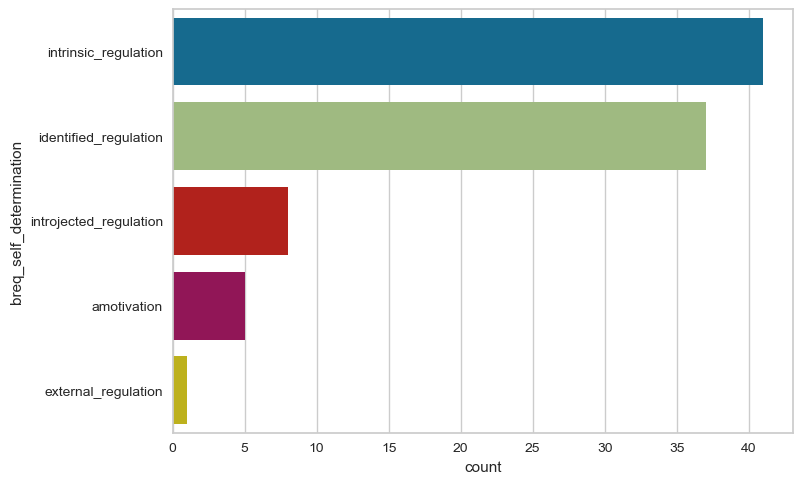

In [40]:
sns.countplot(y="breq_self_determination", data=breq)

In [41]:
breq['breq_self_determination'].replace(to_replace=['intrinsic_regulation', 'identified_regulation', 'introjected_regulation', 'amotivation', 'external_regulation'], value=[0, 1, 2, 3, 4], inplace=True)

<AxesSubplot: xlabel='count', ylabel='breq_self_determination'>

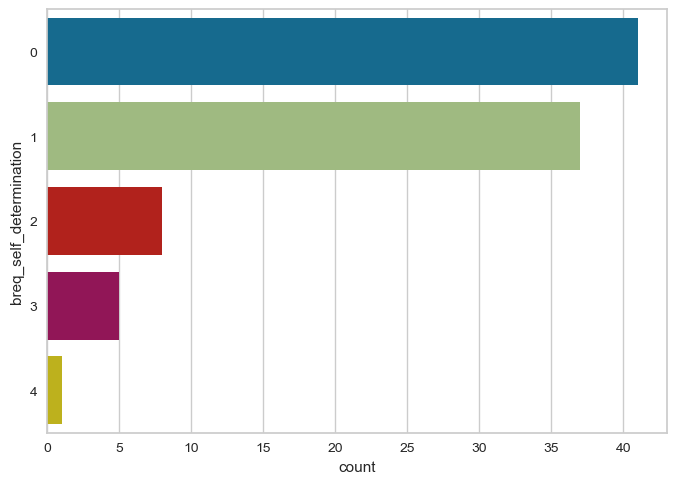

In [42]:
sns.countplot(y="breq_self_determination", data=breq)

In [45]:
breq = breq.sort_values(by='date', ascending=True)
breq['date'] = pd.to_datetime(breq['date'].astype("str"), format='%Y-%m-%d')

In [46]:
fitbit=pd.read_pickle('data/daily_fitbit_df_unprocessed.pkl')
fitbit=preprocessing_functions.fitbit_basic_preprocessing(fitbit)
fitbit=preprocessing_functions.fitbit_one_hot_encoding(fitbit)

In [47]:
data = pd.merge(fitbit, breq, on=['date','id'], how='inner')
data

,id,date,nightly_temperature,nremhr,rmssd,spo2,full_sleep_breathing_rate,stress_score,sleep_points_percentage,exertion_points_percentage,...,Run,Spinning,Sport,Swim,Treadmill,Walk,Weights,Workout,Yoga/Pilates,breq_self_determination
0,621e2f3967b776a240c654db,2021-05-31,33.124766,75.366,22.920,NaN,16.6,75.0,0.933333,0.800,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,621e2fce67b776a240279baa,2021-05-31,34.379283,73.504,21.036,98.0,15.2,82.0,0.966667,0.825,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0
2,621e2fb367b776a24015accd,2021-05-31,34.312944,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1
3,621e328667b776a240281372,2021-05-31,33.658822,63.698,33.857,NaN,14.8,88.0,0.766667,1.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
4,621e34db67b776a240c9c2be,2021-05-31,34.847500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,621e356967b776a24027bd9f,2022-01-17,NaN,57.327,73.746,NaN,16.8,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
72,621e33cf67b776a240087de9,2022-01-17,34.647437,60.891,54.032,NaN,12.0,85.0,0.700000,0.925,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1
73,621e331067b776a24085dd3f,2022-01-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
74,621e312a67b776a240164d59,2022-01-17,34.237581,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [48]:
data = preprocessing_functions.date_engineering(data)
data

,id,nightly_temperature,nremhr,rmssd,spo2,full_sleep_breathing_rate,stress_score,sleep_points_percentage,exertion_points_percentage,responsiveness_points_percentage,...,Yoga/Pilates,breq_self_determination,month_sin,weekday_sin,week_sin,day_sin,month_cos,weekday_cos,week_cos,day_cos
0,621e2f3967b776a240c654db,33.124766,75.366,22.920,NaN,16.6,75.0,0.933333,0.800,0.500000,...,NaN,0,-0.866025,0.0,-1.000000,-0.984808,0.5,1.0,-2.449913e-15,-0.173648
1,621e2fce67b776a240279baa,34.379283,73.504,21.036,98.0,15.2,82.0,0.966667,0.825,0.666667,...,0.0,0,-0.866025,0.0,-1.000000,-0.984808,0.5,1.0,-2.449913e-15,-0.173648
2,621e2fb367b776a24015accd,34.312944,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,1,-0.866025,0.0,-1.000000,-0.984808,0.5,1.0,-2.449913e-15,-0.173648
3,621e328667b776a240281372,33.658822,63.698,33.857,NaN,14.8,88.0,0.766667,1.000,0.833333,...,0.0,0,-0.866025,0.0,-1.000000,-0.984808,0.5,1.0,-2.449913e-15,-0.173648
4,621e34db67b776a240c9c2be,34.847500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0,-0.866025,0.0,-1.000000,-0.984808,0.5,1.0,-2.449913e-15,-0.173648
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,621e356967b776a24027bd9f,NaN,57.327,73.746,NaN,16.8,NaN,NaN,NaN,NaN,...,0.0,0,0.866025,0.0,0.707107,-0.342020,0.5,1.0,-7.071068e-01,0.939693
72,621e33cf67b776a240087de9,34.647437,60.891,54.032,NaN,12.0,85.0,0.700000,0.925,0.900000,...,0.0,1,0.866025,0.0,0.707107,-0.342020,0.5,1.0,-7.071068e-01,0.939693
73,621e331067b776a24085dd3f,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0,0.866025,0.0,0.707107,-0.342020,0.5,1.0,-7.071068e-01,0.939693
74,621e312a67b776a240164d59,34.237581,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0,0.866025,0.0,0.707107,-0.342020,0.5,1.0,-7.071068e-01,0.939693


In [49]:
train_data, test_data = preprocessing_functions.train_test_split_per_user(data)

fold_groups = train_data.id
train_data = train_data.drop(columns=['id'])
test_data = test_data.drop(columns=['id'])

In [52]:
s = setup(data=train_data, target='breq_self_determination', silent=True, session_id=123, fold_strategy='groupkfold', fold=3,  fold_groups=fold_groups, test_data=test_data)

,Description,Value
0,session_id,123
1,Target,breq_self_determination
2,Target Type,Multiclass
3,Label Encoded,None
4,Original Data,"(52, 66)"
5,Missing Values,True
6,Numeric Features,37
7,Categorical Features,28
8,Ordinal Features,False
9,High Cardinality Features,False


create_model_container: 0
master_model_container: 0
display_container: 1
Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=False, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[],
                                      target='breq_self_determination',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=...
                ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                ('cluster_all', 'passthrough'),
                ('dummy', Dummify(target='breq_self_determination')),
                (

In [53]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.3464,0.0000,0.2086,0.3421,0.2983,-0.0616,-0.0808,0.5700
ada,Ada Boost Classifier,0.3257,0.0000,0.1958,0.3338,0.2851,-0.1058,-0.1214,0.0267
svm,SVM - Linear Kernel,0.2876,0.0000,0.2333,0.0843,0.1300,0.0000,0.0000,0.0067
rf,Random Forest Classifier,0.2876,0.0000,0.2003,0.2993,0.2277,-0.0770,-0.1132,0.0633
lightgbm,Light Gradient Boosting Machine,0.2876,0.0000,0.2333,0.0843,0.1300,0.0000,0.0000,0.2000
dummy,Dummy Classifier,0.2876,0.0000,0.2333,0.0843,0.1300,0.0000,0.0000,0.0033
gbc,Gradient Boosting Classifier,0.2691,0.0000,0.1572,0.2798,0.2433,-0.1135,-0.1337,0.1000
lr,Logistic Regression,0.2484,0.0000,0.1831,0.1919,0.1801,-0.1102,-0.1735,0.9100
nb,Naive Bayes,0.2331,0.0000,0.1331,0.3154,0.2394,-0.0873,-0.1160,0.5500
ridge,Ridge Classifier,0.2298,0.0000,0.1572,0.2435,0.1924,-0.1898,-0.2491,0.0067


create_model_container: 15
master_model_container: 15
display_container: 2
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')
compare_models() succesfully completed......................................
